In [1]:
!pip install Keras-Preprocessing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.1 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re,json,nltk
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import numpy as np
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import LSTM,Dense,Embedding,SpatialDropout1D
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import  confusion_matrix
import seaborn
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import cufflinks as cf
import tensorflow
from tensorflow.keras import Sequential
from plotly.offline import iplot
py.offline.init_notebook_mode(connected=True)
cf.go_offline()
from tensorflow.keras.layers import Bidirectional, GlobalMaxPool1D, Dense, LSTM, Conv1D, Embedding
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
import keras
import tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences as pad
from sklearn.preprocessing import LabelEncoder
import re
import pickle
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score

from keras.models import Sequential
from keras.layers import LSTM,Dense,Embedding,SpatialDropout1D
from keras_preprocessing.sequence import pad_sequences as pad
from keras_preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
!pip install git+https://github.com/paulgavrikov/visualkeras
import visualkeras
from sklearn.metrics import  confusion_matrix
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

  Cloning https://github.com/paulgavrikov/visualkeras to /tmp/pip-req-build-hfyqc_in
  Running command git clone --filter=blob:none --quiet https://github.com/paulgavrikov/visualkeras /tmp/pip-req-build-hfyqc_in
  Resolved https://github.com/paulgavrikov/visualkeras to commit cd169b81be347e2090353ad6fe2bd2e1f4020cf4
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.0/993.0 kB 13.5 MB/s eta 0:00:00
  Created wheel for visualkeras: filename=visualkeras-0.0.2-py3-none-any.whl size=13714 sha256=32ba61be3a7ab767d9adb34016563cc8920500c3b1598a821148109d2e6a223d
  Stored in directory: /tmp/pip-ephem-wheel-cache-t9ouwwc6/wheels/89/d3/c2/937382b33c09192fc84331bbc02c4565d62aeae67e9684c37e
Successfully built visualkeras


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Directory for Mam**

In [4]:
# df=pd.read_csv("/content/drive/MyDrive/MY RESEARCH/EMNLP/Dataset/blp23_sentiment_train.csv")

In [5]:
# file_path="/content/drive/MyDrive/MY RESEARCH/EMNLP/Dataset/blp23_sentiment_train.csv"

# **Directory for Rajesh**

In [6]:
file_path="/content/drive/MyDrive/Research Work/EMNLP/Dataset2/blp23_sentiment_train.csv"

In [7]:
df=pd.read_csv("/content/drive/MyDrive/Research Work/EMNLP/Dataset2/blp23_sentiment_train.csv")

In [8]:
df.head()

,id,text,label
0,10856,এখানে আরো ভালো ভাবে দলীয় ও র এর অবস্থান পাকা হ...,Neutral
1,sentinob_1072,চুয়াডাঙ্গা বাড়ি কে বলেছে আপনার,Neutral
2,sentinob_10530,"ভাই সোনাই ঘোষ এর দই খেয়ে যাইতেন , খুব ই মজার",Positive
3,8001,সমার তালুকদার আপনার ছবিতে ফেসটা কেন জানি বন্য ...,Negative
4,sentinob_10144,ভাইয়া এই নুডলস টা কোথায় কিনতে পাওয়া যাবে প্লিজ...,Positive


In [9]:
df.shape

(35266, 3)

In [10]:
print("Total Comment:",len(df),
      "\nTotal Negative :",len(df[df.label =='Negative']),
      "\nTotal Neutral :",len(df[df.label =='Neutral']),
      "\nTotal Positive :",len(df[df.label=='Positive']))

Total Comment: 35266 
Total Negative : 15767 
Total Neutral : 7135 
Total Positive : 12364


My Data is not Label, Now I want to Label My Data using sampling

# **Remove Duplicates**

In [11]:
df.shape

(35266, 3)

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.shape

(35266, 3)

Here Are no duplicate values

# **In this section I want to check null value**

In [14]:
df.isnull().sum()

id       0
text     0
label    0
dtype: int64

# **Remove Small Text and Long Text**

In [15]:
df['no_char'] = df['text'].apply(lambda Sentence: len(Sentence))

In [16]:
df['length'] = df['text'].apply(lambda x:len(x.split()))

In [17]:
dataset = df.loc[df.length>6]
dataset = dataset.reset_index(drop = True)
print("After Cleaning:","\nRemoved {} Small conversations".format(len(df)-len(dataset)),
      "\nTotal conversations:",len(dataset))

After Cleaning: 
Removed 6623 Small conversations 
Total conversations: 28643


In [18]:
dataset.shape

(28643, 5)

In [19]:
newdf = dataset.loc[dataset['length'] <= 30]
newdf = newdf.reset_index(drop = True)
print("After Cleaning:","\nRemoved {} Big conversations".format(len(dataset)-len(newdf)),
      "\nTotal conversations:",len(newdf))

After Cleaning: 
Removed 3053 Big conversations 
Total conversations: 25590


In [20]:
newdf.shape

(25590, 5)

In [21]:
df=newdf.copy()

In [22]:
df.shape

(25590, 5)

In [23]:
df.head()

,id,text,label,no_char,length
0,10856,এখানে আরো ভালো ভাবে দলীয় ও র এর অবস্থান পাকা হ...,Neutral,56,14
1,sentinob_10530,"ভাই সোনাই ঘোষ এর দই খেয়ে যাইতেন , খুব ই মজার",Positive,45,11
2,8001,সমার তালুকদার আপনার ছবিতে ফেসটা কেন জানি বন্য ...,Negative,75,15
3,sentinob_10144,ভাইয়া এই নুডলস টা কোথায় কিনতে পাওয়া যাবে প্লিজ...,Positive,57,11
4,29871,বাংলাদেশে ফেসবুক ডট কম ডট বিডি ডোমেইন ব্যবহারে...,Negative,57,9


# **Below I have cleaned my dataset (Puncuation,links, emoji, non-character)**

In [24]:
import pandas as pd
import regex as re

def remove_non_bengali_characters(sentence):
    cleaned_sentence = re.sub(r'\P{Bengali}+', ' ', sentence)
    return cleaned_sentence.strip()

In [25]:
df['Sentences'] = df['text'].apply(remove_non_bengali_characters)

In [26]:
df.drop(["id","no_char","text"],axis=1,inplace=True)

In [27]:
df.head()

,label,length,Sentences
0,Neutral,14,এখানে আরো ভালো ভাবে দলীয় ও র এর অবস্থান পাকা হ...
1,Positive,11,ভাই সোনাই ঘোষ এর দই খেয়ে যাইতেন খুব ই মজার
2,Negative,15,সমার তালুকদার আপনার ছবিতে ফেসটা কেন জানি বন্য ...
3,Positive,11,ভাইয়া এই নুডলস টা কোথায় কিনতে পাওয়া যাবে প্লিজ...
4,Negative,9,বাংলাদেশে ফেসবুক ডট কম ডট বিডি ডোমেইন ব্যবহারে...


In [28]:
import re

# Define a regular expression pattern to match Bengali characters and spaces
bengali_pattern = re.compile("[\u0980-\u09FF ]+")

# Function to remove non-Bengali characters from a string
def remove_non_bengali_chars(text):
    return "".join(filter(bengali_pattern.match, text))

# Apply the function to each element in your dataset
df['Bengali_Text'] = df['Sentences'].apply(remove_non_bengali_chars)


In [29]:
df.drop(["Sentences","length"],axis=1,inplace=True)

In [30]:
df.head()

,label,Bengali_Text
0,Neutral,এখানে আরো ভালো ভাবে দলীয় ও র এর অবস্থান পাকা হ...
1,Positive,ভাই সোনাই ঘোষ এর দই খেয়ে যাইতেন খুব ই মজার
2,Negative,সমার তালুকদার আপনার ছবিতে ফেসটা কেন জানি বন্য ...
3,Positive,ভাইয়া এই নুডলস টা কোথায় কিনতে পাওয়া যাবে প্লিজ...
4,Negative,বাংলাদেশে ফেসবুক ডট কম ডট বিডি ডোমেইন ব্যবহারে...


# **Remove Stopwords**

# **This Directory for mam**

In [31]:
# def process_conversations(Conversation):
#     stp = open('/content/drive/MyDrive/MY RESEARCH/EMNLP/Dataset/Stopwords.txt','r',encoding="utf8").read().split()
#     result = Conversation.split()
#     Conversation = [word.strip() for word in result if word not in stp ]
#     Conversation =" ".join(Conversation)
#     Conversation = re.sub('[^\u0980-\u09FF]',' ',str(Conversation))
#     return Conversation

In [32]:
# df['cleaned'] = df['Bengali_Text'].apply(process_conversations)
# sample_data = [10,400]
# for i in sample_data:
#      print('Original:\n',df.Bengali_Text[i],'\nCleaned:\n',
#            df.cleaned[i],'\n','Detected as:-- ',df.label[i],'\n')

In [33]:
def process_conversations(Conversation):
    stp = open('/content/drive/MyDrive/Research Work/EMNLP/Dataset2/Stopwords.txt','r',encoding="utf8").read().split()
    result = Conversation.split()
    Conversation = [word.strip() for word in result if word not in stp ]
    Conversation =" ".join(Conversation)
    Conversation = re.sub('[^\u0980-\u09FF]',' ',str(Conversation))
    return Conversation

In [34]:
df['cleaned'] = df['Bengali_Text'].apply(process_conversations)
sample_data = [10,400]
for i in sample_data:
     print('Original:\n',df.Bengali_Text[i],'\nCleaned:\n',
           df.cleaned[i],'\n','Detected as:-- ',df.label[i],'\n')

Original:
 এখানে হিন্দুদের পড়া শোনার কথা হচ্ছে না হচ্ছে ছেলে মেয়ে একসাথে পড়াশোনার কথা 
Cleaned:
 হিন্দুদের পড়া শোনার কথা ছেলে মেয়ে একসাথে পড়াশোনার কথা 
 Detected as:--  Neutral 

Original:
 কাফফারা দিতে হবে আমার মত রোজাদারদের স্টারে একটা ট্রিট 
Cleaned:
 কাফফারা মত রোজাদারদের স্টারে একটা ট্রিট 
 Detected as:--  Positive 



In [35]:
df.head()

,label,Bengali_Text,cleaned
0,Neutral,এখানে আরো ভালো ভাবে দলীয় ও র এর অবস্থান পাকা হ...,আরো ভালো দলীয় অবস্থান পাকা
1,Positive,ভাই সোনাই ঘোষ এর দই খেয়ে যাইতেন খুব ই মজার,ভাই সোনাই ঘোষ দই খেয়ে যাইতেন মজার
2,Negative,সমার তালুকদার আপনার ছবিতে ফেসটা কেন জানি বন্য ...,সমার তালুকদার ছবিতে ফেসটা জানি বন্য বন্য লাগতে...
3,Positive,ভাইয়া এই নুডলস টা কোথায় কিনতে পাওয়া যাবে প্লিজ...,ভাইয়া নুডলস টা কোথায় কিনতে পাওয়া প্লিজ একটু বলবেন
4,Negative,বাংলাদেশে ফেসবুক ডট কম ডট বিডি ডোমেইন ব্যবহারে...,বাংলাদেশে ফেসবুক ডট কম ডট বিডি ডোমেইন ব্যবহারে...


# **Stemming**

In [36]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

def stemming (text):
    return ''.join([stemmer.stem(word) for word in text])

df['cleaned']=df['cleaned'].apply(stemming)
df.head()

,label,Bengali_Text,cleaned
0,Neutral,এখানে আরো ভালো ভাবে দলীয় ও র এর অবস্থান পাকা হ...,আরো ভালো দলীয় অবস্থান পাকা
1,Positive,ভাই সোনাই ঘোষ এর দই খেয়ে যাইতেন খুব ই মজার,ভাই সোনাই ঘোষ দই খেয়ে যাইতেন মজার
2,Negative,সমার তালুকদার আপনার ছবিতে ফেসটা কেন জানি বন্য ...,সমার তালুকদার ছবিতে ফেসটা জানি বন্য বন্য লাগতে...
3,Positive,ভাইয়া এই নুডলস টা কোথায় কিনতে পাওয়া যাবে প্লিজ...,ভাইয়া নুডলস টা কোথায় কিনতে পাওয়া প্লিজ একটু বলবেন
4,Negative,বাংলাদেশে ফেসবুক ডট কম ডট বিডি ডোমেইন ব্যবহারে...,বাংলাদেশে ফেসবুক ডট কম ডট বিডি ডোমেইন ব্যবহারে...


In [37]:
df.drop("Bengali_Text",axis=1,inplace=True)

In [38]:
print("Total Comment:",len(df),
      "\nTotal Negative :",len(df[df.label =='Negative']),
      "\nTotal Neutral :",len(df[df.label =='Neutral']),
      "\nTotal Positive :",len(df[df.label=='Positive']))

Total Comment: 25590 
Total Negative : 11567 
Total Neutral : 4775 
Total Positive : 9248


# **My Data is not Labeled That's why I am going to Augment my Neutral Data**

In [39]:
df.head()

,label,cleaned
0,Neutral,আরো ভালো দলীয় অবস্থান পাকা
1,Positive,ভাই সোনাই ঘোষ দই খেয়ে যাইতেন মজার
2,Negative,সমার তালুকদার ছবিতে ফেসটা জানি বন্য বন্য লাগতে...
3,Positive,ভাইয়া নুডলস টা কোথায় কিনতে পাওয়া প্লিজ একটু বলবেন
4,Negative,বাংলাদেশে ফেসবুক ডট কম ডট বিডি ডোমেইন ব্যবহারে...


In [40]:
!pip install bangla-stemmer

In [41]:
from bangla_stemmer.stemmer import stemmer
import pandas as pd
def augment_neutral_data(text):
    stmr = stemmer.BanglaStemmer()
    augmented_text = stmr.stem(text)
    return augmented_text
neutral_data = df[df['label'] == 'Neutral']['cleaned']
augmented_neutral_data = neutral_data.apply(augment_neutral_data)
augmented_df = pd.DataFrame({'cleaned': augmented_neutral_data, 'label': 'Neutral'})
# Concatenate the augmented data with the original DataFrame
augmented_df = pd.concat([df, augmented_df], ignore_index=True)

print(augmented_df)

Streaming output truncated to the last 5000 lines.
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..

In [50]:
df=augmented_df.copy()

In [52]:
print("Total Comment:",len(df),
      "\nTotal Negative :",len(df[df.label =='Negative']),
      "\nTotal Neutral :",len(df[df.label =='Neutral']),
      "\nTotal Positive :",len(df[df.label=='Positive']))

Total Comment: 30365 
Total Negative : 11567 
Total Neutral : 9550 
Total Positive : 9248


In [53]:
def label_encoding(df,bool):
  le = LabelEncoder()
  le.fit(df.label)
  encoded_labels = le.transform(df.label)
  labels = np.array(encoded_labels) # Converting into numpy array
  class_names =le.classes_ ## Define the class names again
  if bool == True:
    print(color.BOLD+"\n\t\t\t===== Label Encoding ====="+color.END,"\nClass Names:-->",le.classes_)
  return labels

def dataset_split(news,Label):
  '''
  This function will split the dataset into Train-Test-Validation set
  '''

  X,X_test,y,y_test = train_test_split(news,Label,train_size = 0.8,
                                                  test_size = 0.2,random_state =0)
  X_train,X_valid,y_train,y_valid = train_test_split(X,y,train_size = 0.8,
                                                  test_size = 0.2,random_state =0)
  print(color.BOLD+"Feature Size :======>"+color.END,X_train.shape[1])
  print(color.BOLD+"\nDataset Distribution:\n"+color.END)
  print("\tSet Name","\t\tSize")
  print("\t========\t\t======")

  print("\tFull\t\t\t",news.shape[0],
        "\n\tTraining\t\t",X_train.shape[0],
        "\n\tTest\t\t\t",X_test.shape[0],
        "\n\tValidation\t\t",X_valid.shape[0])

  return X_train,X_valid,X_test,y_train,y_valid,y_test

In [45]:
class color: # Text style
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [46]:
def encoded_texts(dataset,padding_length,max_words):

  tokenizer = Tokenizer(num_words = max_words, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~\t\n-',
                      split=' ', char_level=False, oov_token='', document_count=0)
  tokenizer.fit_on_texts(df.cleaned)
  (word_counts,word_docs,word_index,document_count) = (tokenizer.word_counts,
                                                       tokenizer.word_docs,
                                                       tokenizer.word_index,
                                                       tokenizer.document_count)
  def tokenizer_info(mylist,bool):
    ordered = sorted(mylist.items(), key= lambda item: item[1],reverse = bool)
    for w,c in ordered[:10]:
      print(w,"\t",c)
  print(color.BOLD+"\t\t\t====== Tokenizer Info ======"+color.END)
  print("Words --> Counts:")
  tokenizer_info(word_counts,bool =True )
  print("\nWords --> Documents:")
  tokenizer_info(word_docs,bool =True )
  print("\nWords --> Index:")
  tokenizer_info(word_index,bool =True )
  print("\nTotal Documents -->",document_count)

  #=========================== Convert string into list of integer indices =================
  sequences = tokenizer.texts_to_sequences(df.cleaned)
  word_index = tokenizer.word_index
  print(color.BOLD+"\n\t\t\t====== Encoded Sequences ======"+color.END,"\nFound {} unique tokens".format(len(word_index)))
  print(df.cleaned[10],"\n",sequences[10])

  #==================================== Pad Sequences ==============================
  corpus = pad(sequences, value=0.0,
                                                      padding='post', maxlen= padding_length)
  print("\n\t\t\t====== Paded Sequences ======\n",df.cleaned[10],"\n",corpus[10])

  #=================================     Label Encoding ================================
  labels = label_encoding(df,True)

   # save the tokenizer into a pickle file
  with open(file_path+'tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

  return corpus,labels

#call the function
num_words = 5000
corpus,labels = encoded_texts(df,
                                300,num_words)
print("\nShape of Encoded Corpus =====>",corpus.shape)

			====== Tokenizer Info ======
Words --> Counts:
ভাই 	 1930
ভালো 	 1344
টাকা 	 1215
কথা 	 1116
একটা 	 950
ভিডিও 	 862
মানুষ 	 825
এক 	 798
সাথে 	 780
দিয়ে 	 778

Words --> Documents:
ভাই 	 1839
ভালো 	 1244
টাকা 	 1073
কথা 	 1052
একটা 	 905
মানুষ 	 798
ভিডিও 	 778
এক 	 768
দিয়ে 	 744
সাথে 	 723

Words --> Index:
টেহা 	 39539
করেযা 	 39538
কভ 	 39537
চুষ 	 39536
অবশ্য 	 39535
একবার 	 39534
ছরা 	 39533
কোলাকু 	 39532
থামছি 	 39531
না 	 39530

Total Documents --> 30365

			====== Encoded Sequences ====== 
Found 39539 unique tokens
হিন্দুদের পড়া শোনার কথা ছেলে মেয়ে একসাথে পড়াশোনার কথা 
 [1229, 2121, 2676, 5, 199, 1421, 854, 1, 5]

			====== Paded Sequences ======
 হিন্দুদের পড়া শোনার কথা ছেলে মেয়ে একসাথে পড়াশোনার কথা 
 [1229 2121 2676    5  199 1421  854    1    5    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0 

In [47]:
#Call Dataset Split Function
X_train,X_valid,X_test,y_train,y_valid,y_test = dataset_split(corpus,labels)

Feature Size :======> 300

Dataset Distribution:

	Set Name 		Size
	========		======
	Full			 30365 
	Training		 19433 
	Test			 6073 
	Validation		 4859


In [48]:
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
callbacks = [ReduceLROnPlateau(monitor='val_loss', patience=5, cooldown=0),
             EarlyStopping(monitor='val_accuracy', min_delta=1e-4, patience=5)]

In [49]:
max_fatures = 500
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(df['cleaned'].values)
X = tokenizer.texts_to_sequences(df['cleaned'].values)
X = pad_sequences(X)

In [54]:
import tensorflow as tf
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Define your data and hyperparameters
embedding_dimension = 128
input_length = 300
vocab_size = 5000
num_classes = 3
batch_size = 64
num_epochs = 150

# Calculate class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

# Build the combined model
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dimension, input_length=input_length),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),  # CNN layer
    tf.keras.layers.MaxPooling1D(5),
    tf.keras.layers.LSTM(64, return_sequences=True, dropout=0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(28, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.summary()

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 128)          640000    
                                                                 
 conv1d (Conv1D)             (None, 296, 128)          82048     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 59, 128)          0         
 )                                                               
                                                                 
 lstm (LSTM)                 (None, 59, 64)            49408     
                                                                 
 flatten (Flatten)           (None, 3776)              0         
                                                                 
 dense (Dense)               (None, 28)                105756    
                                                        

In [55]:
# Train the model with class weights
history=model.fit(
    X_train, y_train,
    class_weight=dict(enumerate(class_weights)),
    batch_size=batch_size,
    epochs=50,
    validation_data=(X_valid, y_valid)
)

Epoch 1/50
304/304 [==============================] - 47s 94ms/step - loss: 1.0543 - accuracy: 0.4229 - val_loss: 1.0075 - val_accuracy: 0.4701
Epoch 2/50
304/304 [==============================] - 7s 22ms/step - loss: 0.8876 - accuracy: 0.5343 - val_loss: 0.9575 - val_accuracy: 0.5197
Epoch 3/50
304/304 [==============================] - 5s 16ms/step - loss: 0.6332 - accuracy: 0.6977 - val_loss: 0.8590 - val_accuracy: 0.6444
Epoch 4/50
304/304 [==============================] - 5s 15ms/step - loss: 0.4025 - accuracy: 0.8329 - val_loss: 0.9277 - val_accuracy: 0.6691
Epoch 5/50
304/304 [==============================] - 5s 17ms/step - loss: 0.2747 - accuracy: 0.8959 - val_loss: 1.0670 - val_accuracy: 0.6629
Epoch 6/50
304/304 [==============================] - 4s 15ms/step - loss: 0.1893 - accuracy: 0.9337 - val_loss: 1.2308 - val_accuracy: 0.6503
Epoch 7/50
304/304 [==============================] - 6s 18ms/step - loss: 0.1381 - accuracy: 0.9538 - val_loss: 1.3163 - val_accuracy: 0.660

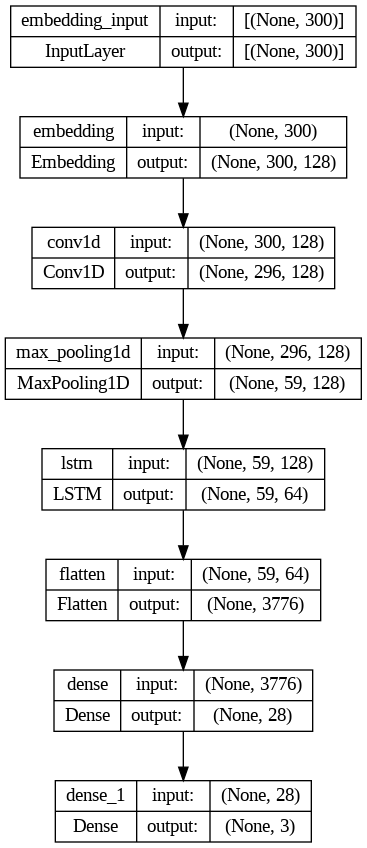

In [56]:
tf.keras.utils.plot_model(model, show_shapes=True)

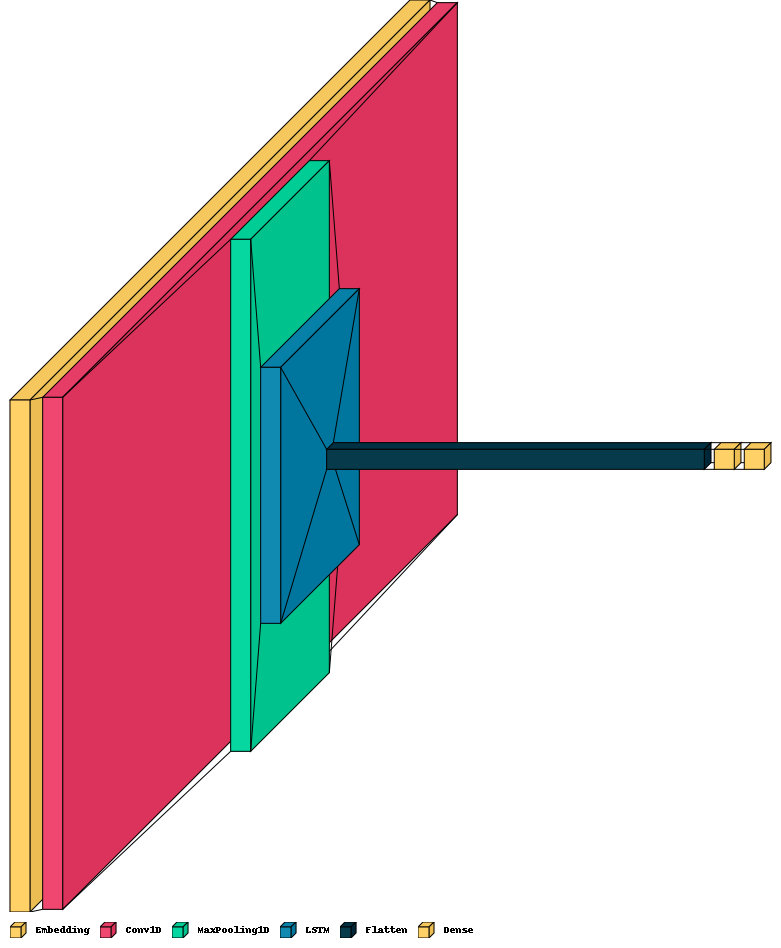

In [57]:
visualkeras.layered_view(model, legend=True)

In [58]:
score = model.evaluate(X_train, y_train,batch_size=64, verbose=2)
print('Train loss:', score[0])
print('Train accuracy:', score[1])

304/304 - 1s - loss: 0.0140 - accuracy: 0.9927 - 1s/epoch - 4ms/step
Train loss: 0.013995019719004631
Train accuracy: 0.9926928281784058


In [59]:
score = model.evaluate(X_test, y_test,batch_size=64, verbose=2)
print('Test loss:', score[0])
acc=score[1]
print('Test accuracy:', acc)


95/95 - 0s - loss: 2.8584 - accuracy: 0.6759 - 395ms/epoch - 4ms/step
Test loss: 2.8583767414093018
Test accuracy: 0.6759427189826965


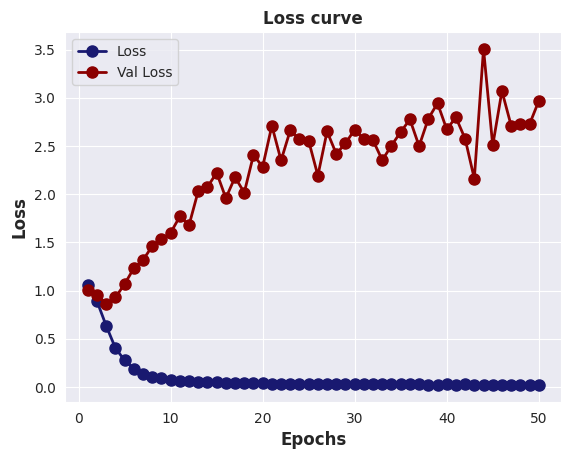

In [60]:
loss_values = history.history['loss']
val_loss_values = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)
sns.set_style('darkgrid')


plt.plot(epochs, loss_values, color='midnightblue', linewidth = 2,
          marker='o', markersize=8,label='Training Accuracy')
plt.plot(epochs, val_loss_values, color='darkred', linewidth = 2,
          marker='o', markersize=8,label='Training Accuracy')
plt.title('Loss curve',fontsize=12,fontweight='bold')
plt.xlabel('Epochs',fontsize=12,fontweight='bold')
plt.ylabel('Loss',fontsize=12,fontweight='bold')
plt.legend(['Loss','Val Loss'])


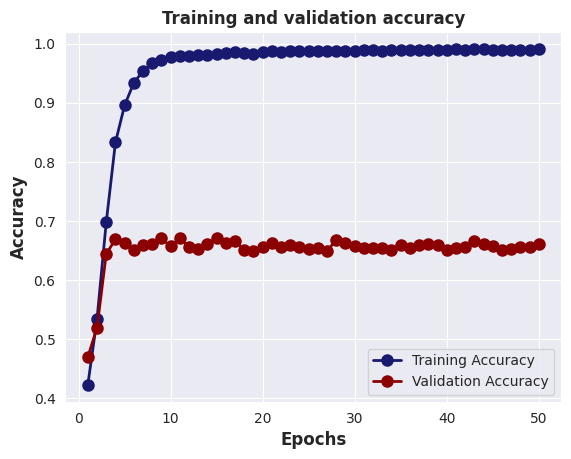

In [61]:
plt.plot(epochs, acc, color='midnightblue', linewidth = 2,
          marker='o', markersize=8,label='Training Accuracy')
plt.plot(epochs, val_acc, color='darkred', linewidth = 2,
          marker='o', markersize=8,label='Training Accuracy')
plt.title('Training and validation accuracy',fontsize=12,fontweight='bold')
plt.xlabel('Epochs',fontsize=12,fontweight='bold')
plt.ylabel('Accuracy',fontsize=12,fontweight='bold')
plt.legend(['Training Accuracy','Validation Accuracy'])

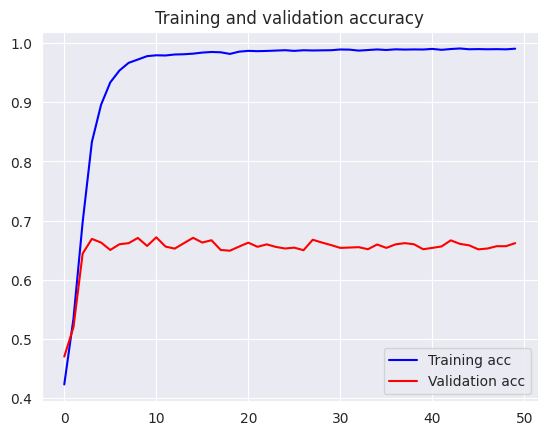

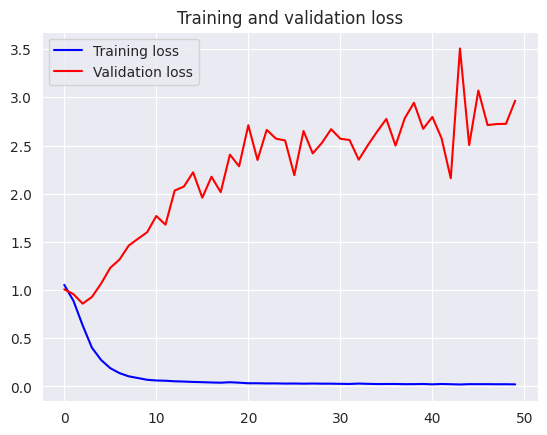

In [62]:
acc,  val_acc  = history.history['accuracy'], history.history['val_accuracy']
loss, val_loss = history.history['loss'], history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [63]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((19433, 300), (19433,), (6073, 300), (6073,))

190/190 [==============================] - 1s 3ms/step


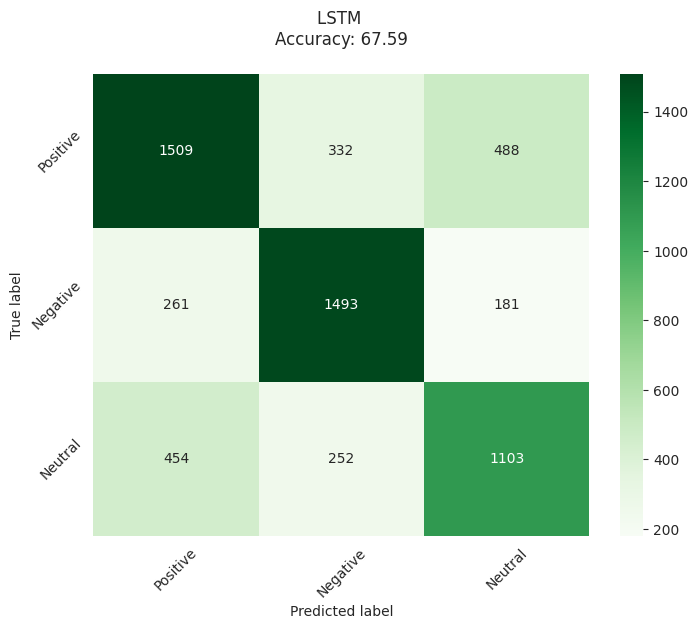

In [64]:
from sklearn.metrics import classification_report, confusion_matrix
predictions = model.predict(X_test)
y_pred = np.argmax(predictions, axis=1)

cm = confusion_matrix(y_test, y_pred)

class_names = ["Positive","Negative","Neutral"]
# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,index = class_names,columns = class_names)

plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True,cmap="Greens", fmt='g')
plt.title('LSTM \nAccuracy: {0:.2f}\n'.format(accuracy_score(y_test, y_pred)*100))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()

In [65]:
report = pd.DataFrame(classification_report(y_test, y_pred,output_dict=True)).transpose()

In [66]:
report = report.rename(index={'0': 'Positive','1':'Negative','2':'Neutral'})
report[['precision','recall','f1-score']]=report[['precision','recall','f1-score']].apply(lambda x: round(x*100,2))
report

,precision,recall,f1-score,support
Positive,67.85,64.79,66.29,2329.000000
Negative,71.88,77.16,74.43,1935.000000
Neutral,62.25,60.97,61.60,1809.000000
accuracy,67.59,67.59,67.59,0.675943
macro avg,67.33,67.64,67.44,6073.000000
weighted avg,67.47,67.59,67.48,6073.000000


In [67]:
sample_comment = 'চুয়াডাঙ্গা বাড়ি কে বলেছে আপনার'
cleaned_comment = process_conversations(sample_comment)

class_names = ["Negative","Positive","Neutral"]

# load the saved tokenizer
with open(file_path+'tokenizer.pickle', 'rb') as handle:
    loaded_tokenizer = pickle.load(handle)
#print(len(loaded_tokenizer.word_index))
seq= loaded_tokenizer.texts_to_sequences([cleaned_comment])
padded = pad(seq, value=0.0,padding='post', maxlen= 300 )
pred = model.predict(padded)
#print(pred)
class_names[np.argmax(pred)]

1/1 [==============================] - 0s 67ms/step


'Positive'

In [68]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Dense

# max_features = max_fatures # Set the maximum number of features
# embed_dim = 64
# filters = 128
# kernel_size = 5

# model = Sequential()
# model.add(Embedding(max_features, embed_dim, input_length=X.shape[1]))
# model.add(Conv1D(filters, kernel_size, activation='relu'))
# model.add(MaxPooling1D())
# model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.4))
# model.add(Dense(256, activation='softmax'))
# model.add(Dense(2, activation='sigmoid'))
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# model.summary()


In [69]:
# Assuming you have already trained the model using the provided code

# Save the trained model to a file
model.save('/content/drive/MyDrive/Research Work/EMNLP/Output/trained_model.h5')

In [70]:
model = tf.keras.models.load_model('/content/drive/MyDrive/Research Work/EMNLP/Output/trained_model.h5')

In [71]:
new_data = pd.read_csv('/content/drive/MyDrive/Research Work/EMNLP/Dataset2/blp23_sentiment_dev_test.csv')

In [72]:
new_data.head()

,id,text
0,30670,* করোনায় আরো ১৮৭ জনের মৃত্যু; মোট প্রাণহানি ...
1,4125,চাপাবাজীর চাপে এবার ধামাচাপা পড়বে আসল ইসু
2,27077,কুয়েতে বাংলাদেশী ফল খেতে হামলে পড়ছেন প্রবাসীরা
3,17552,তিনি ছিলেন টেস্ট খেলা সবচেয়ে বেশি বয়সী জীবিত...
4,4137,চাল আর পাট গুলো উৎপাদন করতে যে কৃষকের বাঁশ ঢুক...


In [73]:
# After training your model
model.save('/content/drive/MyDrive/Research Work/EMNLP/Output')  # Specify the path where you want to save the model

In [74]:
model = tf.keras.models.load_model('/content/drive/MyDrive/Research Work/EMNLP/Output/trained_model.h5')  # Specify the correct path

with open(file_path+'tokenizer.pickle', 'rb') as handle:
    loaded_tokenizer = pickle.load(handle)


In [75]:
new_data="/content/drive/MyDrive/Research Work/EMNLP/TSV to CSV/blp23_sentiment_test.tsv"
new_data = pd.read_csv(new_data, sep='\t')

In [76]:
new_data['text'] = new_data['text'].apply(process_conversations)

In [77]:

# Convert text to sequences and pad
sequences = loaded_tokenizer.texts_to_sequences(new_data['text'])
padded_sequences = pad_sequences(sequences, value=0.0, padding='post', maxlen=300)

# Generate predictions
predictions = model.predict(padded_sequences)

# Get predicted classes
predicted_classes = [np.argmax(pred) for pred in predictions]

# Map predicted class indices to class names
class_names = ["Negative", "Positive", "Neutral"]
predicted_class_names = [class_names[index] for index in predicted_classes]

# Add predicted column to the DataFrame
new_data['predicted'] = predicted_class_names


210/210 [==============================] - 1s 3ms/step


In [78]:
new_data.head()

,id,text,predicted
0,7135,মুখস্ত শিক্ষা জাতি বাংলাদেশ শিক্ষার সার্টিফি...,Neutral
1,28949,জর্ডানের সাবেক যুবরাজ প্রিন্স হামজার ভিডিও বার...,Negative
2,10210,ছেলের দুর্ভাগ্য সৌভাগ্য জানিনা জ্বর স্কুল পারে...,Positive
3,9526,পাকিস্তান আফগানিস্তান ভারতের হয়ে,Negative
4,2142,আরো মিথ্যাচার,Negative


In [79]:
new_data.drop("text",axis=1,inplace=True)

In [80]:
import pandas as pd

# Assuming you have the DataFrame 'test_df' with the added 'predicted' column
output_xlsx_path = '/content/drive/MyDrive/Research Work/EMNLP/Output/path_to_predicted_result.xlsx'  # Specify the correct path and filename

# Save the DataFrame to an Excel file
new_data.to_excel(output_xlsx_path, index=False)


In [81]:
import pandas as pd

# Assuming you have the DataFrame 'new_data' with the added 'predicted' column
output_tsv_path = '/content/drive/MyDrive/Research Work/EMNLP/Output/path_to_predicted_result.tsv'  # Specify the correct path and filename

# Save the DataFrame to a TSV file
new_data.to_csv(output_tsv_path, sep='\t', index=False)